<a href="https://colab.research.google.com/github/JamesChung821/python/blob/master/%E3%80%8CInterpolation_and_Smoothing_example_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Belianinov
#Sandia National Laboratory
# Ion Beam Laboratory 

### Interpolation and Smoothing Example

There are several general interpolation facilities available in SciPy, for data in 1, 2, and higher dimensions:

* A class representing an interpolant (interp1d) in 1-D, offering several interpolation methods.
* Convenience function griddata offering a simple interface to interpolation in N dimensions (N = 1, 2, 3, 4, …). 
* Functions for 1- and 2-dimensional (smoothed) cubic-spline interpolation, based on the FORTRAN library FITPACK. 
* Interpolation using Radial Basis Functions.

In [ ]:
from scipy import interpolate
from scipy.interpolate import interp1d #data processing library 1D
from scipy.interpolate import griddata #data processing library 2D
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = [16, 9] #figure size

In [ ]:
x = np.linspace(0, 10, num=11, endpoint=True) #make a 0-10 array
print(x) #prints the whole array
print(len(x)) #prints the length

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
11


In [ ]:
y = np.cos(-x**2/5.0) #some funky function
print(y)
print(len(y)) 

[ 1.          0.98006658  0.69670671 -0.22720209 -0.99829478  0.28366219
  0.60835131 -0.93042627  0.97283257 -0.88137249  0.40808206]
11


In [ ]:
f = interp1d(x, y) #linear interpolation
f2 = interp1d(x, y, kind='cubic') #cubic interpolation

In [ ]:
x_new = np.linspace(0, 10, num=41, endpoint=True) #0-10 array with finer sampling
print(x_new)
print(len(x_new))

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.    4.25  4.5   4.75  5.    5.25  5.5   5.75
  6.    6.25  6.5   6.75  7.    7.25  7.5   7.75  8.    8.25  8.5   8.75
  9.    9.25  9.5   9.75 10.  ]
41


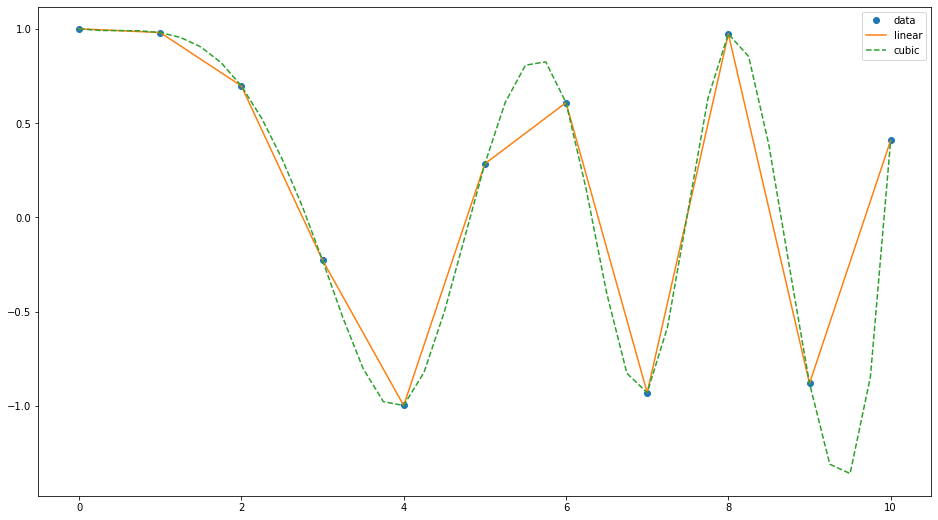

In [ ]:
#plot different interpolations
plt.plot(x, y, 'o', x_new, f(x_new), '-', x_new, f2(x_new), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### Spline Interpolation

This direct method finds the spline representation of a curve in a two- dimensional plane using the function splrep. The first two arguments are the only ones required, and these provide the  and  components of the curve. The normal output is a 3-tuple,  , containing the knot-points,  , the coefficients  and the order  of the spline. The default spline order is cubic, but this can be changed with the input keyword, k.

In [ ]:
#make a spline interpolation object
tck = interpolate.splrep(x, y, s=0) 
y_new = interpolate.splev(x_new, tck, der=0)

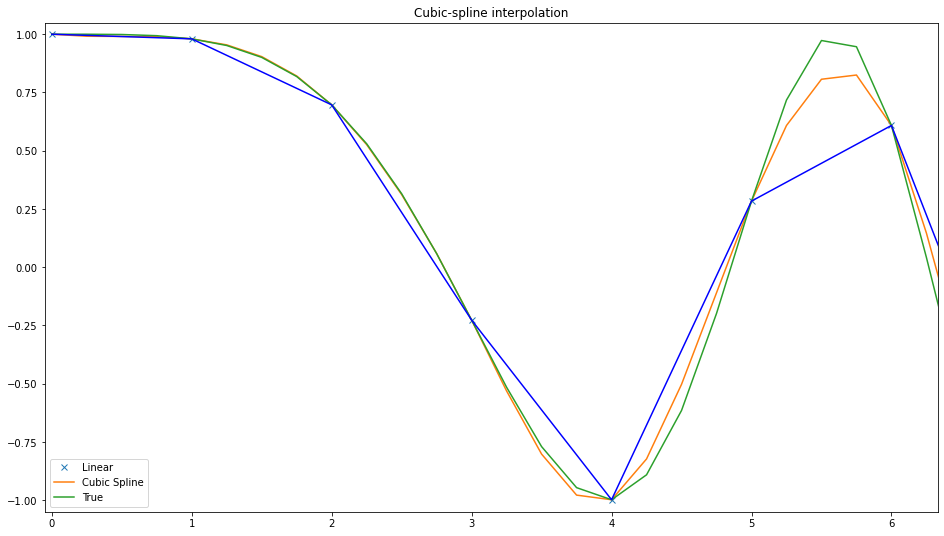

In [ ]:
#plot the different interpolations
plt.figure()
plt.plot(x, y, 'x', x_new, y_new, x_new, np.cos(-x_new**2/5.0), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

### 2D Spline

In [ ]:
x, y = np.mgrid[-1:1:20j, -1:1:20j] #create a 2D grid
z = (x+y) * np.exp(-3.0*(x**2+y**2)) #convert into a functional output

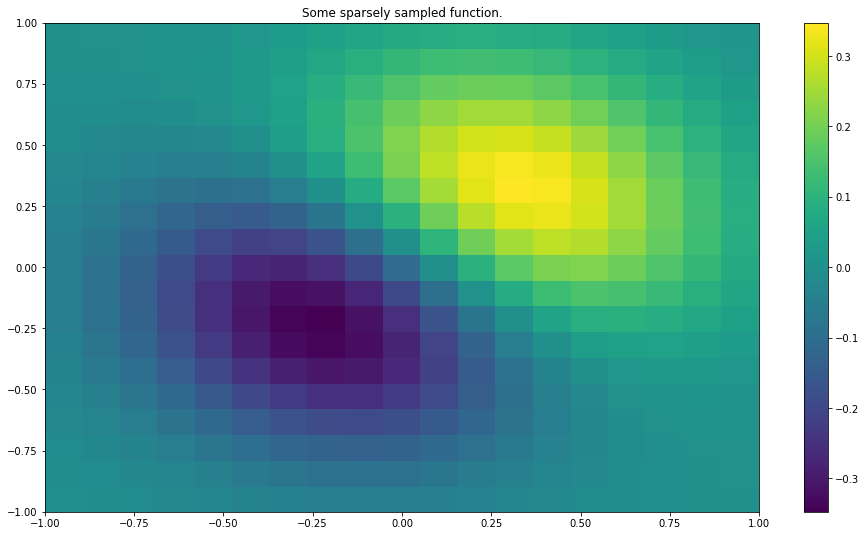

In [ ]:
#plot
plt.figure()
plt.pcolor(x, y, z)
plt.colorbar()
plt.title("Some sparsely sampled function.")
plt.show()

In [ ]:
x_new, y_new = np.mgrid[-1:1:100j, -1:1:100j] #finer 2D grid
tck = interpolate.bisplrep(x, y, z, s=0) #new spline object
z_new = interpolate.bisplev(x_new[:,0], y_new[0,:], tck)

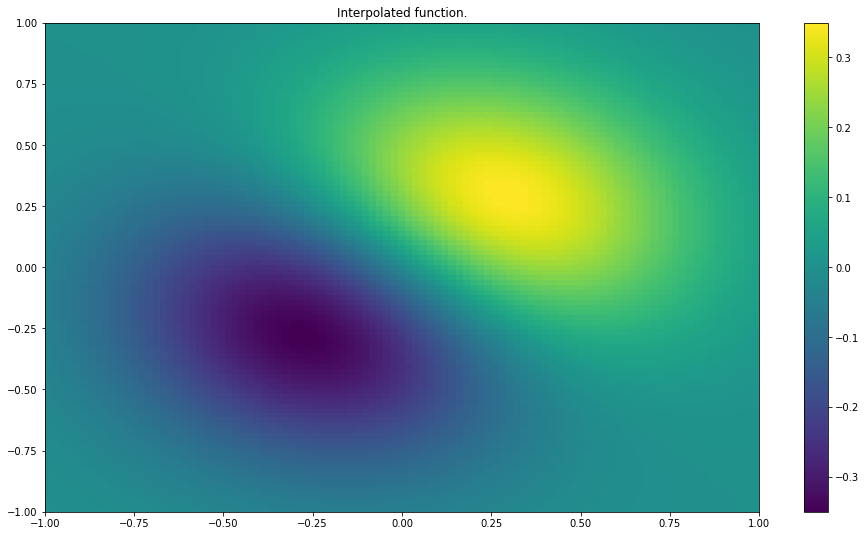

In [ ]:
#plot
plt.figure()
plt.pcolor(x_new, y_new, z_new)
plt.colorbar()
plt.title("Interpolated function.")
plt.show()

### 2D Nearest, Linear, Cubic

Suppose you have multidimensional data, for instance for an underlying function f(x, y) you only know the values at points (x[i], y[i]) that do not form a regular grid.

In [ ]:
def func(x, y): #let's make a function, like the one before
    return (x+y) * np.exp(-3.0*(x**2+y**2))

In [ ]:
grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j] #lets use a 100x200 grid

In [ ]:
points = np.random.rand(50, 2) #but only have some of the points are defined
values = func(points[:,0], points[:,1])

In [ ]:
z0 = griddata(points, values, (grid_x, grid_y), method='nearest') #three different interpolation methods
z1 = griddata(points, values, (grid_x, grid_y), method='linear')
z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

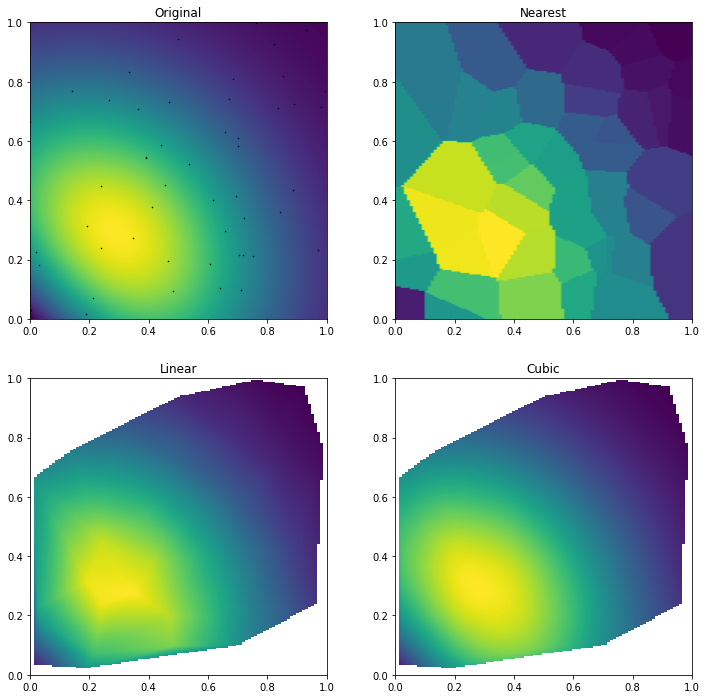

In [ ]:
#plot all the different interpolations
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(12, 12)
plt.show()